## 앙상블(Ensemble)
- 일반화와 강건성(Robustness)을 향상시키기 위해 여러 모델의 예측값을 결합하는 방법
- 앙상블에는 크게 두가지 종류가 존재
    - 평균 방법
        - 여러개의 추정값을 독립적으로 구한뒤 평균을 취함
        - 결합 추정값은 분산이 줄어들기 때문에 단일 추정값보다 좋은 성능을 보임
    - 부스팅 방법
        - 순차적으로 모델 생성
        - 결합된 모델의 편향을 감소 시키기 위해 노력
        - 부스팅 방법의 목표는 여러개의 약한 모델들을 결합해 하나의 강력한 앙상블 모델을 구축하는 것

### Bagging meta-estimator
- bagging은 bootstrap aggregating의 줄일말
- 원래 훈련 데이터셋의 일부를 사용해 여러 모델을 훈련
- 각각의 결과를 결합해 최종 결과를 생성
- 분산을 줄이고 과적합을 막음
- 강력하고 복잡한 모델에서 잘 동작

In [54]:
from sklearn.datasets import load_iris,load_wine,load_breast_cancer,load_boston,load_diabetes,load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [26]:
iris = load_iris()
wine = load_wine()
cancer = load_breast_cancer()

### KNN

### 붓꽃 데이터

In [27]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier())

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [28]:
cross_val = cross_validate(
    estimator=base_model,
    X=iris.data, y=iris.target,
    cv=5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.001306629180908203 (+/- 0.0002064764140911109)
avg fit time : 0.0018104076385498046 (+/- 0.0002537076437243432)
avg fit time : 0.96 (+/- 0.024944382578492935)


In [29]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=iris.data, y=iris.target,
    cv=5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.017792606353759767 (+/- 0.006589745591395576)
avg fit time : 0.005329799652099609 (+/- 0.0003029023891407388)
avg fit time : 0.9466666666666667 (+/- 0.03399346342395189)


### 와인 데이터

In [30]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier())

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [31]:
cross_val = cross_validate(
    estimator=base_model,
    X=wine.data, y=wine.target,
    cv=5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.0018503665924072266 (+/- 0.0005806320393791886)
avg fit time : 0.0027733802795410155 (+/- 0.000699191555856165)
avg fit time : 0.9493650793650794 (+/- 0.037910929811115976)


In [32]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=wine.data, y=wine.target,
    cv=5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.017124271392822264 (+/- 0.004414462871181075)
avg fit time : 0.005654096603393555 (+/- 0.0006064318170088241)
avg fit time : 0.9607936507936508 (+/- 0.028521119729020605)


### 유방암 데이터

In [72]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier())

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [73]:
cross_val = cross_validate(
    estimator=base_model,
    X=cancer.data, y=cancer.target,
    cv=5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.0017691612243652343 (+/- 0.0003962325586142843)
avg fit time : 0.0068152427673339845 (+/- 0.001405872639678888)
avg fit time : 0.9648501785437045 (+/- 0.009609970350036127)


In [74]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=cancer.data, y=cancer.target,
    cv=5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.017553281784057618 (+/- 0.002584510286254534)
avg fit time : 0.013084697723388671 (+/- 0.003976276630760154)
avg fit time : 0.9560627231796305 (+/- 0.005550027511330691)


### SVC

### 붓꽃 데이터

In [36]:
base_model = make_pipeline(
    StandardScaler(),
    SVC())

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [37]:
cross_val = cross_validate(
    estimator=base_model,
    X=iris.data, y=iris.target,
    cv=5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.001664590835571289 (+/- 0.0004300431829923277)
avg fit time : 0.0005677223205566406 (+/- 0.00018532148401499018)
avg fit time : 0.9666666666666666 (+/- 0.02108185106778919)


In [38]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=iris.data, y=iris.target,
    cv=5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.023563575744628907 (+/- 0.0063930177440188335)
avg fit time : 0.002536916732788086 (+/- 0.00016805649236658073)
avg fit time : 0.9399999999999998 (+/- 0.038873012632301994)


### 와인 데이터

In [39]:
base_model = make_pipeline(
    StandardScaler(),
    SVC())

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [40]:
cross_val = cross_validate(
    estimator=base_model,
    X=wine.data, y=wine.target,
    cv=5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.0020119667053222655 (+/- 0.0004835870881474673)
avg fit time : 0.0006556510925292969 (+/- 0.0002540238692157407)
avg fit time : 0.9833333333333334 (+/- 0.022222222222222233)


In [41]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=wine.data, y=wine.target,
    cv=5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.023818826675415038 (+/- 0.005581728765807982)
avg fit time : 0.002727794647216797 (+/- 0.00013182226842532586)
avg fit time : 0.9606349206349206 (+/- 0.013879588722983607)


### 유방암 데이터

In [69]:
base_model = make_pipeline(
    StandardScaler(),
    SVC())

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [70]:
cross_val = cross_validate(
    estimator=base_model,
    X=cancer.data, y=cancer.target,
    cv=5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.004565382003784179 (+/- 0.0007365149721461314)
avg fit time : 0.0011417388916015625 (+/- 0.0001196273530219412)
avg fit time : 0.9736376339077782 (+/- 0.014678541667933545)


In [71]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=cancer.data, y=cancer.target,
    cv=5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.030019760131835938 (+/- 0.004816534068132992)
avg fit time : 0.0059258460998535155 (+/- 0.0011589634729437966)
avg fit time : 0.9718987734823784 (+/- 0.015070253421173813)


### Decision Tree

### 붓꽃 데이터

In [45]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier())

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [46]:
cross_val = cross_validate(
    estimator=base_model,
    X=iris.data, y=iris.target,
    cv=5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.0011280536651611327 (+/- 0.0002560287237876389)
avg fit time : 0.0003972053527832031 (+/- 0.00011170463843462996)
avg fit time : 0.9600000000000002 (+/- 0.03265986323710903)


In [47]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=iris.data, y=iris.target,
    cv=5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.022824621200561522 (+/- 0.005632464147005469)
avg fit time : 0.0018923759460449218 (+/- 6.351041349711767e-05)
avg fit time : 0.9399999999999998 (+/- 0.04898979485566355)


### 와인 데이터

In [48]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier())

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [49]:
cross_val = cross_validate(
    estimator=base_model,
    X=wine.data, y=wine.target,
    cv=5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.001819467544555664 (+/- 0.0005179626066443685)
avg fit time : 0.0004505157470703125 (+/- 9.3642926903394e-05)
avg fit time : 0.8709523809523809 (+/- 0.03738625985979144)


In [50]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=wine.data, y=wine.target,
    cv=5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.02250781059265137 (+/- 0.0037956840442061697)
avg fit time : 0.0020667552947998048 (+/- 0.00030582643973030407)
avg fit time : 0.9553968253968254 (+/- 0.037610674843479096)


### 유방암 데이터

In [62]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier())

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [67]:
cross_val = cross_validate(
    estimator=base_model,
    X=cancer.data, y=cancer.target,
    cv=5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.010749149322509765 (+/- 0.0028700757347433093)
avg fit time : 0.0008124828338623047 (+/- 0.00033906687644236905)
avg fit time : 0.912063344201211 (+/- 0.020385417671820154)


In [68]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=cancer.data, y=cancer.target,
    cv=5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.03227872848510742 (+/- 0.007504751209552407)
avg fit time : 0.002162647247314453 (+/- 0.00015168147280410137)
avg fit time : 0.94027324949542 (+/- 0.02621098259835838)


### Bagging을 사용한 회귀

In [55]:
boston = load_boston()
diabetes = load_diabetes()

### KNN

### 보스턴 데이터

In [87]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor())

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [88]:
cross_val = cross_validate(
    estimator=base_model,
    X=boston.data, y=boston.target,
    cv=5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.00186309814453125 (+/- 0.0009363482716540912)
avg fit time : 0.0021016597747802734 (+/- 0.0007877423889929858)
avg fit time : 0.47357748833823543 (+/- 0.13243123464477455)


In [91]:
cross_val = cross_validate(
estimator=bagging_model,
X=boston.data, y=boston.target,
cv=5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.020149612426757814 (+/- 0.005749095465765781)
avg fit time : 0.008934640884399414 (+/- 0.002708526603065018)
avg fit time : 0.4890152292791893 (+/- 0.08731753971560162)


### 당뇨병 데이터

In [92]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor())

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [93]:
cross_val = cross_validate(
    estimator=base_model,
    X=diabetes.data, y=diabetes.target,
    cv=5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.0015610218048095702 (+/- 0.0004469844815186845)
avg fit time : 0.002080202102661133 (+/- 0.0005239347520958028)
avg fit time : 0.3689720650295623 (+/- 0.044659049060165365)


In [94]:
cross_val = cross_validate(
estimator=bagging_model,
X=diabetes.data, y=diabetes.target,
cv=5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.0195770263671875 (+/- 0.0054884932531705155)
avg fit time : 0.008546209335327149 (+/- 0.003136780185410698)
avg fit time : 0.39766756344271553 (+/- 0.043756394418103695)


### SVR

### 보스턴 데이터

In [95]:
base_model = make_pipeline(
    StandardScaler(),
    SVR())

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [96]:
cross_val = cross_validate(
    estimator=base_model,
    X=boston.data, y=boston.target,
    cv=5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.008629655838012696 (+/- 0.0013487722717769508)
avg fit time : 0.0017674922943115234 (+/- 0.00012363318122315188)
avg fit time : 0.17631266230186618 (+/- 0.5224914915128981)


In [97]:
cross_val = cross_validate(
estimator=bagging_model,
X=boston.data, y=boston.target,
cv=5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.03053145408630371 (+/- 0.006909689835654528)
avg fit time : 0.005902433395385742 (+/- 0.001127519081578672)
avg fit time : 0.21267207295487137 (+/- 0.31354741894950994)


### 당뇨병 데이터

In [98]:
base_model = make_pipeline(
    StandardScaler(),
    SVR())

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [99]:
cross_val = cross_validate(
    estimator=base_model,
    X=diabetes.data, y=diabetes.target,
    cv=5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.005786418914794922 (+/- 0.0007499341705377728)
avg fit time : 0.0013948917388916016 (+/- 7.547740286524942e-05)
avg fit time : 0.14659936199629434 (+/- 0.02190798003342928)


In [100]:
cross_val = cross_validate(
estimator=bagging_model,
X=diabetes.data, y=diabetes.target,
cv=5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.027827978134155273 (+/- 0.005070187004374518)
avg fit time : 0.0049912452697753905 (+/- 0.0006865030114347253)
avg fit time : 0.0685844053375376 (+/- 0.028165937354322775)


### Decision Tree

### 보스턴 데이터

In [101]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor())

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [102]:
cross_val = cross_validate(
    estimator=base_model,
    X=boston.data, y=boston.target,
    cv=5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.00412454605102539 (+/- 0.0009763901505338655)
avg fit time : 0.0006959915161132812 (+/- 5.655747020347971e-05)
avg fit time : 0.150315386606169 (+/- 0.8169960066995117)


In [103]:
cross_val = cross_validate(
estimator=bagging_model,
X=boston.data, y=boston.target,
cv=5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.02880253791809082 (+/- 0.006999446084700365)
avg fit time : 0.0027371883392333985 (+/- 0.0014842069770181592)
avg fit time : 0.4262127485959599 (+/- 0.2959546082259827)


### 당뇨병 데이터

In [104]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor())

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [107]:
cross_val = cross_validate(
    estimator=base_model,
    X=diabetes.data, y=diabetes.target,
    cv=5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.006539106369018555 (+/- 0.0037630318077964326)
avg fit time : 0.0009508609771728515 (+/- 0.00021200543630882634)
avg fit time : -0.15688895822455007 (+/- 0.11295406375206347)


In [108]:
cross_val = cross_validate(
estimator=bagging_model,
X=diabetes.data, y=diabetes.target,
cv=5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.025860166549682616 (+/- 0.004770054926812101)
avg fit time : 0.0020174503326416014 (+/- 7.296144553045905e-05)
avg fit time : 0.363444027762099 (+/- 0.043319780911418804)


### Forest of randomized  trees
- sklearn.ensemble 모듈에는 무작위 결정 트리를 기반으로 하는 두개의 평균화 알고리즘이 존재
    - Random Forest
    - Extra-Trees
- 모델 구성에 임의성을 추가해 다양한 모델 집합이 생성
- 앙상블 모델의 예측은 각 모델의 평균

In [109]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

### Random Forest 분류

In [110]:
model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)

In [111]:
cross_val = cross_validate(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.11970810890197754 (+/- 0.01715370378290568)
avg fit time : 0.006055641174316406 (+/- 0.00025089988658878043)
avg fit time : 0.9666666666666668 (+/- 0.02108185106778919)


In [112]:
cross_val = cross_validate(
    estimator=model,
    X=wine.data, y=wine.target,
    cv=5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.11990714073181152 (+/- 0.012351784430500407)
avg fit time : 0.0063686370849609375 (+/- 0.0005165536240852559)
avg fit time : 0.9777777777777779 (+/- 0.02721655269759088)


In [113]:
cross_val = cross_validate(
    estimator=model,
    X=cancer.data, y=cancer.target,
    cv=5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.1793900489807129 (+/- 0.018173334316534374)
avg fit time : 0.0069233417510986325 (+/- 0.0007112677435963427)
avg fit time : 0.9543083372147182 (+/- 0.022461576637183036)


### Random Forest 회귀

In [119]:
model = make_pipeline(
    StandardScaler(),
    RandomForestRegressor()
)

In [123]:
cross_val = cross_validate(
    estimator=model,
    X=boston.data, y=boston.target,
    cv=5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.25882811546325685 (+/- 0.011474778307150893)
avg fit time : 0.005750417709350586 (+/- 0.0005587697373722782)
avg fit time : 0.6287605051301888 (+/- 0.19284359795615374)


In [124]:
cross_val = cross_validate(
    estimator=model,
    X=diabetes.data, y=diabetes.target,
    cv=5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.20459442138671874 (+/- 0.019057779978444912)
avg fit time : 0.005533599853515625 (+/- 0.00028738934779703974)
avg fit time : 0.41661960460221825 (+/- 0.04279223615515433)


### Extremely Randomized Tree 분류

In [125]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesClassifier()
)

In [126]:
cross_val = cross_validate(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.08804998397827149 (+/- 0.023634260927278657)
avg fit time : 0.0061149120330810545 (+/- 0.00039853256657677876)
avg fit time : 0.9533333333333334 (+/- 0.03399346342395189)


In [127]:
cross_val = cross_validate(
    estimator=model,
    X=wine.data, y=wine.target,
    cv=5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.08784403800964355 (+/- 0.01987044685971509)
avg fit time : 0.0067958831787109375 (+/- 0.0011645537179777665)
avg fit time : 0.9888888888888889 (+/- 0.022222222222222233)


In [128]:
cross_val = cross_validate(
    estimator=model,
    X=cancer.data, y=cancer.target,
    cv=5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.10731549263000488 (+/- 0.02149584035134047)
avg fit time : 0.007034730911254883 (+/- 0.0004126886462417435)
avg fit time : 0.9630802670392795 (+/- 0.01704210686761715)


### Extremely Randomized Forest 회귀

In [129]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesRegressor()
)

In [130]:
cross_val = cross_validate(
    estimator=model,
    X=boston.data, y=boston.target,
    cv=5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.1544931411743164 (+/- 0.011729700641604033)
avg fit time : 0.005896472930908203 (+/- 0.00041638333144173787)
avg fit time : 0.6450774414209348 (+/- 0.24237948008534088)


In [131]:
cross_val = cross_validate(
    estimator=model,
    X=diabetes.data, y=diabetes.target,
    cv=5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.12975893020629883 (+/- 0.009035886246432182)
avg fit time : 0.005867481231689453 (+/- 0.0004753470503050705)
avg fit time : 0.4253906037238376 (+/- 0.034361528159100097)


### Random Forest, Extra Tree 시각화
- 결정트리, Random Forest, Extra Tree의 결정 경계와 회귀식 시각화

In [168]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])
from matplotlib.colors import LightSource
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier

In [169]:
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02
plot_step_coarser = 0.5
RANDOM_SEED = 13

In [170]:
iris = load_iris()
plot_idx = 1
models = [DecisionTreeClassifier(max_depth=None),
         RandomForestClassifier(n_estimators=n_estimators),
         ExtraTreesClassifier(n_estimators=n_estimators)]

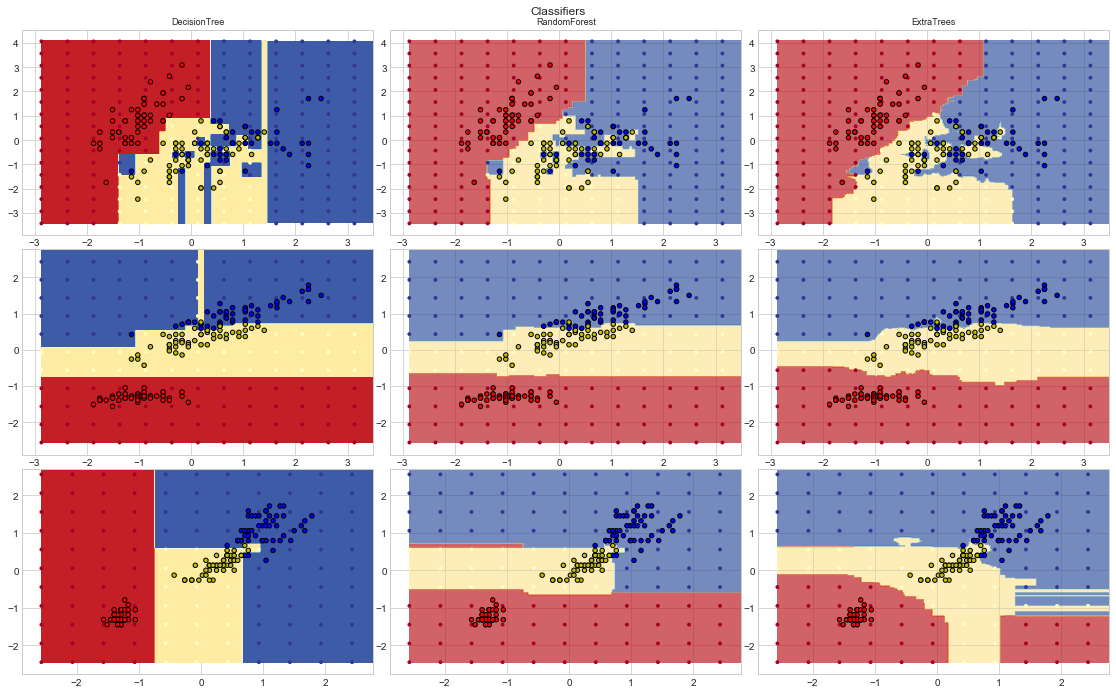

In [171]:
plt.figure(figsize=(16,10))

for pair in ([0,1],[0,2],[2,3]):
    
    for model in models:
        
        X = iris.data[:,pair]
        y = iris.target
        
        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X=X[idx]
        y=y[idx]
        
        mean=X.mean(axis=0)
        std = X.std(axis=0)
        X=(X-mean)/std
        
        model.fit(X,y)
        
        model_title = str(type(model)).split(".")[-1][:-2][:-len("Classifier")]
        
        plt.subplot(3,3,plot_idx)
        if plot_idx <= len(models):
            plt.title(model_title, fontsize=9)
            
        x_min, x_max = X[:,0].min()-1,X[:,0].max()+1
        y_min, y_max = X[:,1].min()-1,X[:,1].max()+1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                            np.arange(y_min, y_max, plot_step))
        
        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx,yy,Z,cmap=cmap)
        else:
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = plt.contourf(xx,yy,Z,alpha=estimator_alpha,cmap=cmap)
                
        xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min,x_max,plot_step_coarser),
                                            np.arange(y_min,y_max,plot_step_coarser))
        Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                              yy_coarser.ravel()]).reshape(xx_coarser.shape)
        cs_points = plt.scatter(xx_coarser,yy_coarser,s=15,
                               c=Z_points_coarser,cmap=cmap,
                               edgecolors='none')
        
        
        plt.scatter(X[:,0],X[:,1],c=y,
                   cmap=ListedColormap(['r','y','b']),
                   edgecolors='k', s=20)
        plot_idx += 1
        
plt.suptitle('Classifiers', fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=0.2,w_pad=0.2,pad=2.5)
plt.show()

In [211]:
plot_idx = 1
models = [DecisionTreeRegressor(max_depth=None),
         RandomForestRegressor(n_estimators=n_estimators),
         ExtraTreesRegressor(n_estimators=n_estimators)]

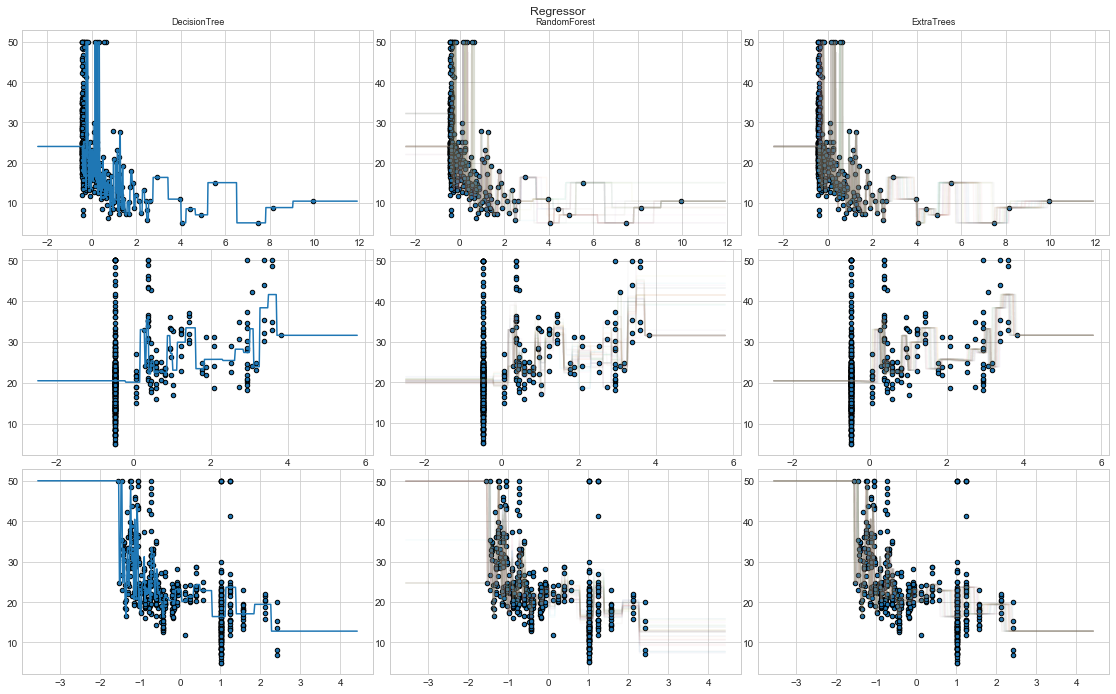

In [212]:
plt.figure(figsize=(16,10))

for pair in (0,1,2):
    
    for model in models:
        
        X = boston.data[:,pair]
        y = boston.target
        
        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X=X[idx]
        y=y[idx]
        
        mean=X.mean(axis=0)
        std = X.std(axis=0)
        X=(X-mean)/std
        
        model.fit(X.reshape(-1,1),y)
        
        model_title = str(type(model)).split(".")[-1][:-2][:-len("Regressor")]
        
        plt.subplot(3,3,plot_idx)
        if plot_idx <= len(models):
            plt.title(model_title, fontsize=9)
            
        x_min, x_max = X.min()-1,X.max()+1
        y_min, y_max = y.min()-1,y.max()+1
        xx, yy = np.arange(x_min-1, x_max+1, plot_step), np.arange(y_min-1, y_max+1, plot_step)
        
        if isinstance(model, DecisionTreeRegressor):
            Z = model.predict(xx.reshape(-1,1))
            cs= plt.plot(xx,Z)
        else:
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(xx.reshape(-1,1))
                cs= plt.plot(xx,Z,alpha=estimator_alpha)
        
        plt.scatter(X,y,
                   edgecolors='k', s=20)
        plot_idx += 1
        
plt.suptitle('Regressor', fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=0.2,w_pad=0.2,pad=2.5)
plt.show()

### AdaBoost
- 대표적인 부스팅 알고리즘
- 일련의 약한 모델들을 학습
- 수정된 버전의 데이터를 반복 학습(가중치가 적용된)
- 가중치 투표(또는 합)을 통해 각 모델의 예측값을 결합
- 첫 단계에서는 원본 데이터를 학습하고 연속적인 반복마다 개별 샘플에 대한 가중치가 수정되고 다시 모델이 학습
    - 잘못 예측된 샘플은 가중치 증가, 올바르게 예측된 샘플은 가중치 감소
    - 각각의 약한 모델들은 예측하기 어려운 샘플에 집중하게됨 (like 틀린문제를 다시 푸는 법 오답노트 기법)

In [213]:
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor

### AdaBoost 분류

In [232]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier())

In [233]:
cross_val = cross_validate(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.06607136726379395 (+/- 0.009710752897339303)
avg fit time : 0.00922842025756836 (+/- 0.0044130230926730605)
avg fit time : 0.9466666666666667 (+/- 0.03399346342395189)


In [234]:
cross_val = cross_validate(
    estimator=model,
    X=wine.data, y=wine.target,
    cv=5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.07249841690063477 (+/- 0.013124519039523969)
avg fit time : 0.007757806777954101 (+/- 0.001965316221841094)
avg fit time : 0.8085714285714285 (+/- 0.16822356718459935)


In [235]:
cross_val = cross_validate(
    estimator=model,
    X=cancer.data, y=cancer.target,
    cv=5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.1286388397216797 (+/- 0.018128027353335418)
avg fit time : 0.006923532485961914 (+/- 0.0002726005343378368)
avg fit time : 0.9701133364384411 (+/- 0.019709915473893072)


### AdaBoost 회귀

In [223]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostRegressor())

In [227]:
cross_val = cross_validate(
    estimator=model,
    X=boston.data, y=boston.target,
    cv=5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.08895478248596192 (+/- 0.024000212682328784)
avg fit time : 0.004406452178955078 (+/- 0.0016661592643597127)
avg fit time : 0.5927233687480827 (+/- 0.20642566171290538)


In [225]:
cross_val = cross_validate(
    estimator=model,
    X=wine.data, y=wine.target,
    cv=5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.0510744571685791 (+/- 0.020623847155698892)
avg fit time : 0.0034183502197265626 (+/- 0.0013473351013618172)
avg fit time : 0.3273639404074187 (+/- 0.4026824723542505)


In [228]:
cross_val = cross_validate(
    estimator=model,
    X=diabetes.data, y=diabetes.target,
    cv=5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.07128338813781739 (+/- 0.015917661289023426)
avg fit time : 0.003565216064453125 (+/- 0.0002880752643455827)
avg fit time : 0.42283749284471045 (+/- 0.0427948287578383)


### Gradient Tree Boosting
- 임의의 차별화 가능한 손실함수로 일반화한 부스팅 알고리즘
- 웹 검색, 분류 및 회귀 등 다양한 분야에서 모두 사용 가능

In [230]:
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor

### Gradient Tree Boosting 분류

In [236]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier())

In [237]:
cross_val = cross_validate(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.16225972175598144 (+/- 0.024199427713878854)
avg fit time : 0.0007450580596923828 (+/- 1.5702356945714898e-05)
avg fit time : 0.96 (+/- 0.024944382578492935)


In [238]:
cross_val = cross_validate(
    estimator=model,
    X=wine.data, y=wine.target,
    cv=5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.2327329158782959 (+/- 0.04972298034343563)
avg fit time : 0.0008543968200683594 (+/- 0.0002294728773983197)
avg fit time : 0.9328571428571429 (+/- 0.02799056818432652)


In [239]:
cross_val = cross_validate(
    estimator=model,
    X=cancer.data, y=cancer.target,
    cv=5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.3689719200134277 (+/- 0.02131969867277974)
avg fit time : 0.0008742332458496094 (+/- 0.0002791613973992462)
avg fit time : 0.9596180717279925 (+/- 0.02453263202329889)


### Gradient Tree Boosting 회귀

In [240]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingRegressor())

In [241]:
cross_val = cross_validate(
    estimator=model,
    X=boston.data, y=boston.target,
    cv=5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.09773306846618653 (+/- 0.008090034202614435)
avg fit time : 0.0009153842926025391 (+/- 0.0002766298186511996)
avg fit time : 0.685796036379239 (+/- 0.14679899230934046)


In [242]:
cross_val = cross_validate(
    estimator=model,
    X=diabetes.data, y=diabetes.target,
    cv=5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.08346419334411621 (+/- 0.017645166794088278)
avg fit time : 0.0010376453399658203 (+/- 0.0003435246350875055)
avg fit time : 0.4089264642616911 (+/- 0.06834438310049128)


### 투표 기반 분류(Voting Classifier)
- 서로 다른 모델들의 결과를 투표를 통해 결합
- 두가지 방법으로 투표 가능
    - 가장 많이 예측된 클래스를 정답으로 채택(hard voting)
    - 예측된 확률의 평균(soft voting)
    - 참고로 가중치 모델별로 가중치를 주는(weighted voting)

In [243]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import cross_val_score

In [246]:
model1 = SVC()
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators=[('svc',model1),('naive',model2),('forest',model3),],
    voting='hard')

In [251]:
for model in (model1,model2,model3,vote_model):
    model_name = str(type(model)).split('.')[-1][:-2]
    scores = cross_val_score(model, iris.data, iris.target, cv=5)
    print('Accuracy : %0.2f (+/- %0.2f) []%s'%(scores.mean(),scores.std(),model_name))

Accuracy : 0.97 (+/- 0.02) []SVC
Accuracy : 0.95 (+/- 0.03) []GaussianNB
Accuracy : 0.96 (+/- 0.03) []RandomForestClassifier
Accuracy : 0.97 (+/- 0.02) []VotingClassifier


In [252]:
model1 = SVC(probability=True)
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators=[('svc',model1),('naive',model2),('forest',model3),],
    voting='soft',
    weights=[2,1,2])

In [253]:
for model in (model1,model2,model3,vote_model):
    model_name = str(type(model)).split('.')[-1][:-2]
    scores = cross_val_score(model, iris.data, iris.target, cv=5)
    print('Accuracy : %0.2f (+/- %0.2f) []%s'%(scores.mean(),scores.std(),model_name))

Accuracy : 0.97 (+/- 0.02) []SVC
Accuracy : 0.95 (+/- 0.03) []GaussianNB
Accuracy : 0.97 (+/- 0.02) []RandomForestClassifier
Accuracy : 0.96 (+/- 0.02) []VotingClassifier


In [254]:
model1 = SVC(probability=True)
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators=[('svc',model1),('naive',model2),('forest',model3),],
    voting='weight',
    weights=[2,1,2])

### 결정 경계 시각화

In [255]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from itertools import product

In [256]:
X = iris.data[:,[0,2]]
y = iris.target

In [266]:
model1 = DecisionTreeClassifier(max_depth=4)
model2 = KNeighborsClassifier(n_neighbors=7)
model3 = SVC(gamma=0.1, kernel='rbf', probability=True)
vote_model = VotingClassifier(
    estimators=[('dt',model1),('KNN',model2),('SVC',model3),],
    voting='soft',
    weights=[2,1,2])

In [267]:
model1 = model1.fit(X,y)
model2 = model2.fit(X,y)
model3 = model3.fit(X,y)
vote_model = vote_model.fit(X,y)

In [268]:
x_min, x_max = X[:,0].min()-1,X[:,0].max()+1
y_min, y_max = X[:,0].min()-1,X[:,0].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                    np.arange(y_min, y_max, 0.1))

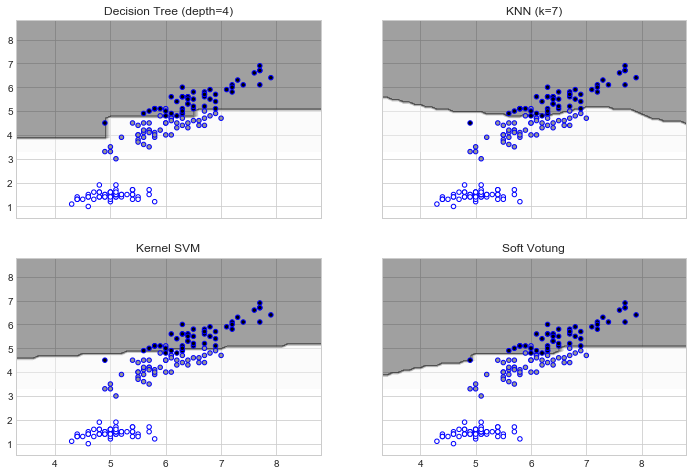

In [275]:
f, axrr = plt.subplots(2,2,sharex='col',sharey='row',figsize=(12,8))

for idx, model, tt in zip(product([0,1],[0,1]),
                           [model1,model2,model3,vote_model],
                           ['Decision Tree (depth=4)','KNN (k=7)',
                           'Kernel SVM', 'Soft Voting']):
    Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    axrr[idx[0],idx[1]].contourf(xx,yy,Z,alpha=0.4)
    axrr[idx[0],idx[1]].scatter(X[:,0],X[:,1],c=y,s=20,edgecolor='b')
    axrr[idx[0],idx[1]].set_title(tt)
    
plt.show()

### 투표 기반 회귀(Voting Regressor)
- 서로 다른 모델의 예측값의 평균을 사용

In [276]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingRegressor

In [282]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(
    estimators=[('linear',model1),('gbr',model2),('rfr',model3),],
    weights=[1,1,1])

In [283]:
for model in (model1,model2,model3,vote_model):
    model_name = str(type(model)).split('.')[-1][:-2]
    scores = cross_val_score(model, boston.data, boston.target, cv=5)
    print('R^2 : %0.2f (+/- %0.2f) []%s'%(scores.mean(),scores.std(),model_name))

R^2 : 0.35 (+/- 0.38) []LinearRegression
R^2 : 0.68 (+/- 0.15) []GradientBoostingRegressor
R^2 : 0.62 (+/- 0.22) []RandomForestRegressor
R^2 : 0.65 (+/- 0.21) []VotingRegressor


### 회귀식 시각화

In [315]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [316]:
X = boston.data[:,5].reshape(-1,1) # feature choice
y = boston.target

In [317]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(
    estimators=[('linear',model1),('gbr',model2),('rfr',model3),],
    weights=[1,1,1])

model1 = model1.fit(X,y)
model2 = model2.fit(X,y)
model3 = model3.fit(X,y)
vote_model = vote_model.fit(X,y)

In [318]:
x_min, x_max = X[:,0].min()-1,X[:,0].max()+1
y_min, y_max = X[:,0].min()-1,X[:,0].max()+1
xx = np.arange(x_min-1, x_max+1, 0.1)

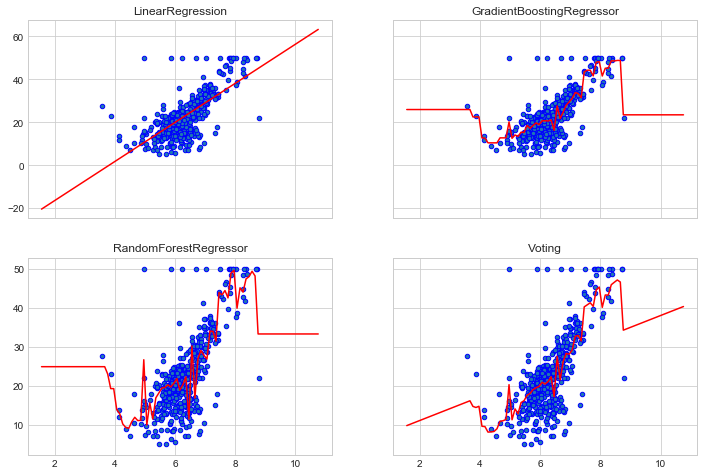

In [319]:
f, axrr = plt.subplots(2,2,sharex='col',sharey='row',figsize=(12,8))

for idx, model, tt in zip(product([0,1],[0,1]),
                           [model1,model2,model3,vote_model],
                           ['LinearRegression','GradientBoostingRegressor',
                           'RandomForestRegressor', 'Voting']):
    Z = model.predict(xx.reshape(-1,1))
    
    axrr[idx[0],idx[1]].plot(xx,Z,c='r')
    axrr[idx[0],idx[1]].scatter(X,y,s=20,edgecolor='b')
    axrr[idx[0],idx[1]].set_title(tt)
    
plt.show()

### 스택 일반화(Stacked Generalization)
- 각 모델의 예측값을 최종 모델의 입력으로 사용
- 모델의 편향을 줄이는데 효과적

In [320]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor

In [321]:
estimators = [('ridge', Ridge()),
             ('lasso', Lasso()),
             ('svr', SVR())]

In [327]:
reg = make_pipeline(
    StandardScaler(),
    StackingRegressor(
        estimators=estimators,
        final_estimator=GradientBoostingRegressor()
    )
)

In [328]:
cross_val = cross_validate(
    estimator=reg,
    X=boston.data, y=boston.target,
    cv=5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.11081781387329101 (+/- 0.01580005853874092)
avg fit time : 0.0024709701538085938 (+/- 0.0007063064514313935)
avg fit time : 0.3224866996002485 (+/- 0.3284730442607752)


### 회귀식 시각화

In [329]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [342]:
X = boston.data[:,5].reshape(-1,1) # feature choice
y = boston.target

In [343]:
model1 = Ridge()
model2 = Lasso()
model3 = SVR()
reg = StackingRegressor(
        estimators=estimators,
        final_estimator=GradientBoostingRegressor()
    )

model1 = model1.fit(X,y)
model2 = model2.fit(X,y)
model3 = model3.fit(X,y)
vote_model = vote_model.fit(X,y)

In [344]:
x_min, x_max = X[:,0].min()-1,X[:,0].max()+1
y_min, y_max = X[:,0].min()-1,X[:,0].max()+1
xx = np.arange(x_min-1, x_max+1, 0.1)

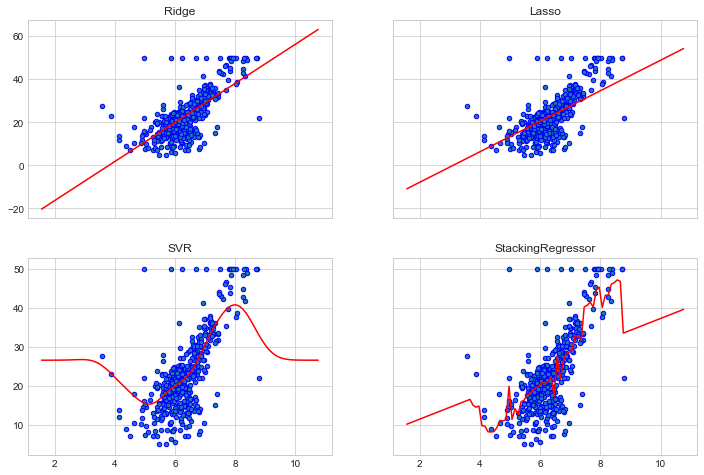

In [345]:
f, axrr = plt.subplots(2,2,sharex='col',sharey='row',figsize=(12,8))

for idx, model, tt in zip(product([0,1],[0,1]),
                           [model1,model2,model3,vote_model],
                           ['Ridge','Lasso',
                           'SVR', 'StackingRegressor']):
    Z = model.predict(xx.reshape(-1,1))
    
    axrr[idx[0],idx[1]].plot(xx,Z,c='r')
    axrr[idx[0],idx[1]].scatter(X,y,s=20,edgecolor='b')
    axrr[idx[0],idx[1]].set_title(tt)
    
plt.show()

### 스택 분류

In [346]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, StackingClassifier

In [350]:
estimators = [('logistic', LogisticRegression(max_iter=10000)),
             ('svc',SVC()),
             ('naive',GaussianNB())]

In [351]:
clf = StackingClassifier(
    estimators=estimators,
    final_estimator=RandomForestClassifier()
)

In [352]:
cross_val = cross_validate(
    estimator=clf,
    X=iris.data, y=iris.target,
    cv=5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.283023738861084 (+/- 0.006015414843949533)
avg fit time : 0.007241058349609375 (+/- 0.00044941087356183156)
avg fit time : 0.9666666666666666 (+/- 0.02108185106778919)


### 결정 경계 시각화

In [374]:
X = iris.data[:,[0,2]]
y = iris.target

In [375]:
model1 = LogisticRegression(max_iter=10000)
model2 = SVC()
model3 = GaussianNB()
stack = StackingClassifier(
    estimators=estimators,
    final_estimator=RandomForestClassifier()
)

In [376]:
model1 = model1.fit(X,y)
model2 = model2.fit(X,y)
model3 = model3.fit(X,y)
stack = stack.fit(X,y)

In [377]:
x_min, x_max = X[:,0].min()-1,X[:,0].max()+1
y_min, y_max = X[:,0].min()-1,X[:,0].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                    np.arange(y_min, y_max, 0.1))

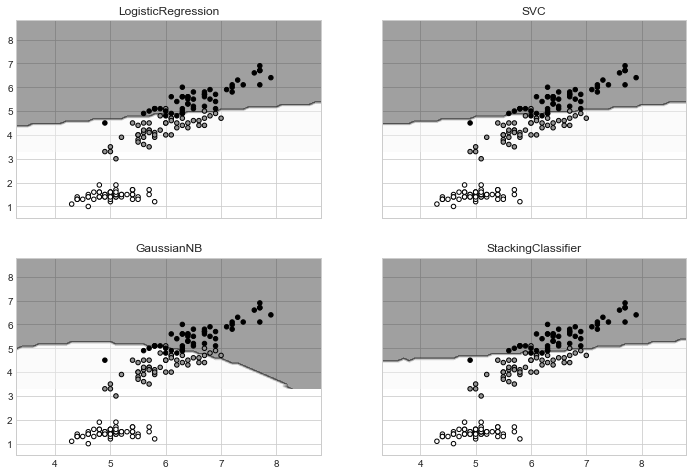

In [379]:
f, axrr = plt.subplots(2,2,sharex='col',sharey='row',figsize=(12,8))

for idx, model, tt in zip(product([0,1],[0,1]),
                           [model1,model2,model3,stack],
                           ['LogisticRegression','SVC',
                           'GaussianNB', 'StackingClassifier']):
    Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    axrr[idx[0],idx[1]].contourf(xx,yy,Z,alpha=0.4)
    axrr[idx[0],idx[1]].scatter(X[:,0],X[:,1],c=y,s=20,edgecolor='k')
    axrr[idx[0],idx[1]].set_title(tt)
    
plt.show()